# Data Preprocessing Notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pip install imbalanced-learn

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load penguins dataset
penguins = sns.load_dataset('penguins')

In [4]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# Fill in missing values
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean())
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean())
penguins['sex'] = penguins['sex'].fillna(penguins['sex'].mode()[0])

In [8]:
penguins.duplicated().sum() # Check for duplicates

0

# Feature Scaling

To ensure fair comparison and contribution of features in manchine learning.

In [9]:
# Standardization (Z-score normalization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [10]:
# Min-max scaling (Normalization)
min_max_scaler = MinMaxScaler()
min_max_scaled_features = min_max_scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [11]:
# Robust scaling
robust_scaler = RobustScaler()
robust_scaled_features = robust_scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

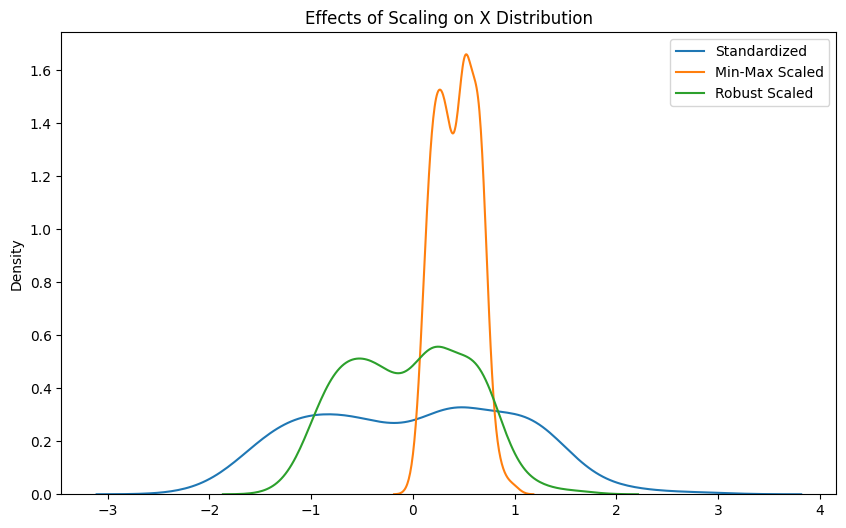

In [12]:
# Visualize scaling effects on feature distributions
fig, ax = plt.subplots(figsize=(10, 6))
# sns.kdeplot(penguins['bill_length_mm'], label='Original', ax=ax)
sns.kdeplot(scaled_features[:,0], label='Standardized', ax=ax)
sns.kdeplot(min_max_scaled_features[:,0], label='Min-Max Scaled', ax=ax)
sns.kdeplot(robust_scaled_features[:,0], label='Robust Scaled', ax=ax)
plt.title('Effects of Scaling on X Distribution')
plt.legend()
plt.show()

# Encoding Categorical Variables

**Nominal**: Categories without inherent order (eg: color)
*one-hot encoding (dummy)
*binary encoding
*label encoding

**Ordinal** : Categories with meaning orders (eg: size)

*Frequency-based encoding: replaces categories with occurrence count
*Target encoding: replaces categories with mean/median of target variables
*Hashing: Applies hash function to reduce dimensionality



In [13]:
# One-hot encoding (Dummy encoding)
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(penguins[['species']])
onehot_encoded = onehot_encoded.toarray()
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out())
onehot_df.value_counts()

species_Adelie  species_Chinstrap  species_Gentoo
1.0             0.0                0.0               152
0.0             0.0                1.0               124
                1.0                0.0                68
Name: count, dtype: int64

In [14]:
penguins['species'].tail(10)

334    Gentoo
335    Gentoo
336    Gentoo
337    Gentoo
338    Gentoo
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, dtype: object

In [15]:
onehot_df.tail(10)

species_Adelie  species_Chinstrap  species_Gentoo
334             0.0                0.0             1.0
335             0.0                0.0             1.0
336             0.0                0.0             1.0
337             0.0                0.0             1.0
338             0.0                0.0             1.0
339             0.0                0.0             1.0
340             0.0                0.0             1.0
341             0.0                0.0             1.0
342             0.0                0.0             1.0
343             0.0                0.0             1.0

In [16]:
# Ordinal encoding (Label encoding)
ordinal_categories = ['Adelie', 'Chinstrap', 'Gentoo']
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories])
ordinal_encoded = ordinal_encoder.fit_transform(penguins[['species']])

In [17]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [18]:
pd.DataFrame(ordinal_encoded, columns=['species_ordinal']).value_counts()

species_ordinal
0.0                152
2.0                124
1.0                 68
Name: count, dtype: int64

In [19]:
pd.DataFrame(ordinal_encoded, columns=['species_ordinal']).head(10)

species_ordinal
0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
5              0.0
6              0.0
7              0.0
8              0.0
9              0.0

# Feature Engineering 

#Interaction features
Ploynomial features
Domain-specific features


In [20]:
# Interaction features
penguins['bill_volume'] = penguins['bill_length_mm'] * penguins['bill_depth_mm']

In [21]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'bill_volume'],
      dtype='object')

In [22]:
# Encode species
species_encoder = OneHotEncoder()
species_encoded = species_encoder.fit_transform(penguins[['species']])
species_encoded = species_encoded.toarray()
species_df = pd.DataFrame(species_encoded, columns=species_encoder.get_feature_names_out())
species_df.head()

# Add species column with encoded species
penguins = pd.concat([penguins, species_df], axis=1)

In [23]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        39.10000       18.70000         181.000000   
1  Adelie  Torgersen        39.50000       17.40000         186.000000   
2  Adelie  Torgersen        40.30000       18.00000         195.000000   
3  Adelie  Torgersen        43.92193       17.15117         200.915205   
4  Adelie  Torgersen        36.70000       19.30000         193.000000   

   body_mass_g     sex  bill_volume  species_Adelie  species_Chinstrap  \
0  3750.000000    Male   731.170000             1.0                0.0   
1  3800.000000  Female   687.300000             1.0                0.0   
2  3250.000000  Female   725.400000             1.0                0.0   
3  4201.754386    Male   753.312467             1.0                0.0   
4  3450.000000  Female   708.310000             1.0                0.0   

   species_Gentoo  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

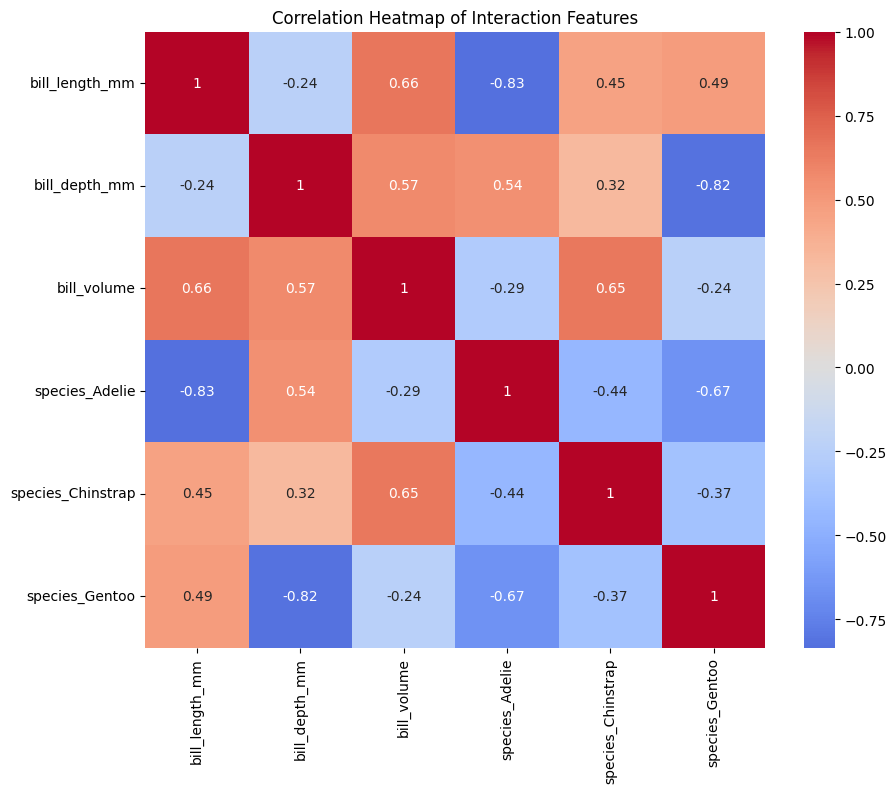

In [24]:
# Visualize interaction features
interaction_features = penguins[['bill_length_mm', 'bill_depth_mm', 'bill_volume', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo']]
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_features.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Interaction Features')
plt.show()

In [25]:
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out())

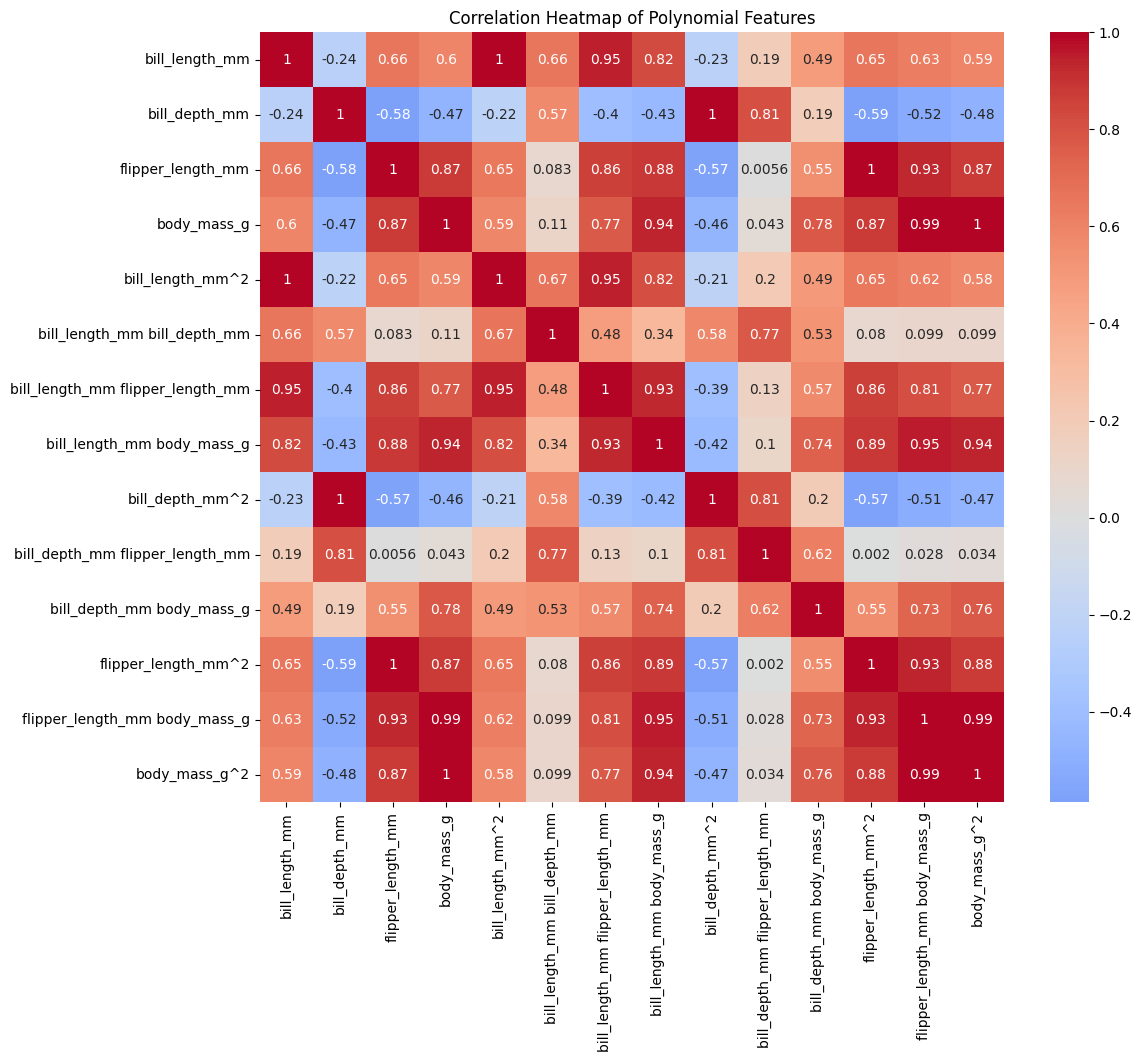

In [26]:
# Visualize polynomial features
plt.figure(figsize=(12, 10))
sns.heatmap(poly_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Polynomial Features')
plt.show()

# Imbalanced Data Handling

oversmapling: to increase the number of instance in the minority class

In [27]:
# Original class distribution
original_distribution = penguins['species'].value_counts()
original_distribution

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [28]:
X = penguins.drop('species', axis=1)
y = penguins['species']

In [29]:
# Random oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
oversample_distribution = pd.Series(y_over).value_counts()

In [30]:
# Random undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
undersample_distribution = pd.Series(y_under).value_counts()

In [31]:
# Encode sex
ordinal_encoder = OrdinalEncoder()
penguins['sex'] = ordinal_encoder.fit_transform(penguins[['sex']])

# Encode island
penguins['island'] = ordinal_encoder.fit_transform(penguins[['island']])

In [32]:
X = penguins.drop('species', axis=1)
y = penguins['species']

In [33]:
# SMOTE
smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(X, y)
smote_distribution = pd.Series(y_smote).value_counts()

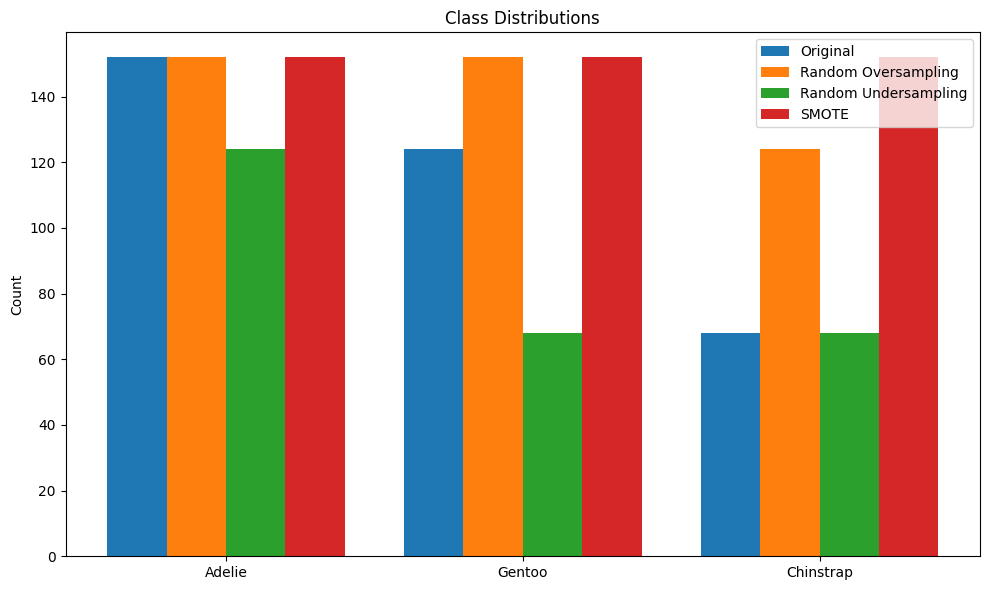

In [34]:
# Plot the class distributions
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
x = np.arange(len(original_distribution))

ax.bar(x - width*1.5, original_distribution, width, label='Original')
ax.bar(x - width/2, oversample_distribution, width, label='Random Oversampling')
ax.bar(x + width/2, undersample_distribution, width, label='Random Undersampling')
ax.bar(x + width*1.5, smote_distribution, width, label='SMOTE')

ax.set_xticks(x)
ax.set_xticklabels(original_distribution.index)
ax.set_ylabel('Count')
ax.set_title('Class Distributions')
ax.legend()

plt.tight_layout()
plt.show()